# детекция аномалий

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.preprocessing import Normalizer, StandardScaler

from tqdm.notebook import tqdm
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, mean_squared_error, precision_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Autoencoder_article/processminer-rare-event-mts - data.csv')

In [ ]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
df.shape

(18398, 63)

In [ ]:
df.y.value_counts()

0    18274
1      124
Name: y, dtype: int64

In [ ]:
124/(124+18274)*100

0.6739863028590064

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [ ]:
# убираем с категорильными данными временными данными
df = df.drop(['time'], axis=1)

In [ ]:
#разделение на трэин и валдиацию
x_train, x_val = train_test_split(df, train_size=0.7, shuffle=True)

In [ ]:
x_val.y.value_counts()

0    5487
1      33
Name: y, dtype: int64

In [ ]:
x_train.head(3)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
16520,0,-0.172707,-0.610108,1.058060,29.367500,-0.064738,43.498390,-0.119206,0.018844,-0.048630,...,-1.689041,-2.237492,3.118728,30.205631,6.267969,-1.165393,0.010021,0.810038,-0.003325,0
17875,0,0.305252,1.063598,2.029560,75.074195,-0.304713,55.317055,-0.039246,-0.011064,0.079809,...,-1.689041,-1.919377,1.402406,86.410221,80.641595,-1.110462,0.015349,0.681856,-0.005485,0
4110,0,-0.356563,8.052825,9.001774,-166.847280,-0.327082,-66.843681,-0.019409,-0.031206,-0.059966,...,-4.309158,-5.319279,2.742168,-33.922665,-9.662695,-2.111499,0.040293,0.583300,0.008370,0


In [ ]:
# #оставляем у трэина только значения с нормальными сессиями
# x_train1 = x_train[x_train.y == 0].drop(['y'], axis=1)
# x_train1.shape

In [ ]:
#оставляем у трэина только значения с нормальными сессиями
x_train1 = x_train[x_train.y == 0].drop(['y'], axis=1)
x_train1.shape

#оставляем у валидации также значения с нормальными сессиями 
x_val1 =  x_val[x_val.y == 0].drop(['y'], axis=1)

#создаем валидацию для теста, в данном примере тестовыми данными будут служить 
# данные с валидации, обогащенные целевыми примерами 
x_test1 = x_val.drop(['y'], axis=1) 
y_test1 = x_val.y

In [ ]:
#стандартизация 
x_train11 = StandardScaler().fit_transform(x_train1)
x_val11 = StandardScaler().fit_transform(x_val1)
x_test11 = StandardScaler().fit_transform(x_test1)

In [ ]:
#перевод в тензора для работы с библиотекой torch
x_train11 = torch.FloatTensor(np.array(x_train11)).reshape(-1, 1, x_train11.shape[1])
x_val11 = torch.FloatTensor(np.array(x_val11)).reshape(-1, 1, x_val11.shape[1])
x_test11 = torch.FloatTensor(np.array(x_test11)).reshape(-1, 1, x_test11.shape[1])

In [ ]:
#создание заагрузчиков в нейросеть 
train_loader = torch.utils.data.DataLoader(x_train11, batch_size=2048)
val_loader = torch.utils.data.DataLoader(x_val11, batch_size=2048)
test_loader = torch.utils.data.DataLoader(x_test11, batch_size=1, shuffle=False)

### Тест логистической регрессии и кэтбуста

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Autoencoder_article/processminer-rare-event-mts - data.csv')

In [ ]:
df1.head(1)

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.11883,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.4734,0.033444,0.953219,0.006076,0


In [ ]:
df1.drop(['time'], axis=1, inplace=True)

In [ ]:
X_tr1 = df1.drop(['y'], axis=1)
y_tr1 = df1['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr1, y_tr1, train_size=0.7, shuffle=True)

In [ ]:
y_test.value_counts()

0    5492
1      28
Name: y, dtype: int64

In [ ]:
y_train[y_train == 0].index

Int64Index([16026,  1785,  9141,  6882,  2653, 11718,  9553, 12401, 14892,
             6291,
            ...
             7165, 11225, 11592, 11810, 10756, 10273, 13923,  4143,  3464,
             6557],
           dtype='int64', length=12787)

In [ ]:
X_train.shape

(12878, 61)

In [ ]:
#значения Х без аномальных значений 
X_train_without_1 = X_train.loc[y_train[y_train == 0].index]
X_train_without_1.shape

(12788, 61)

In [ ]:
X_train1 = StandardScaler().fit_transform(X_train)
# y_train = StandardScaler().fit_transform(y_train)
X_test1 = StandardScaler().fit_transform(X_test)
# y_test = StandardScaler().fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression().fit(X_train, y_train)

In [ ]:
clf1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(clf1.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3671
           1       0.25      0.67      0.36         9

    accuracy                           0.99      3680
   macro avg       0.62      0.83      0.68      3680
weighted avg       1.00      0.99      1.00      3680



In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf2 = CatBoostClassifier(verbose=False).fit(X_train, y_train)

In [ ]:
print(classification_report(clf2.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3662
           1       0.50      0.67      0.57        18

    accuracy                           1.00      3680
   macro avg       0.75      0.83      0.78      3680
weighted avg       1.00      1.00      1.00      3680



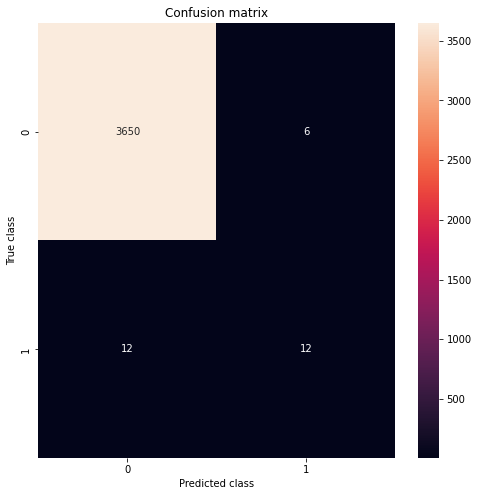

In [ ]:
conf_matrix = confusion_matrix( pd.Series(list(np.array(y_test)))    , clf2.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Тест алгоритмов без учителя Kmeans, agglomerative, SpectralClustering

In [ ]:
X_train_stand = StandardScaler().fit_transform(X_train_without_1) 
X_train_stand.shape

(12788, 61)

0    3466
1    2054
dtype: int64


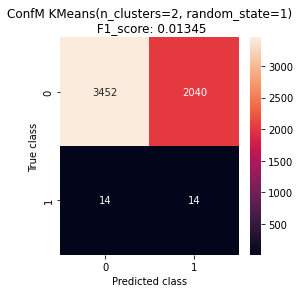

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0    5451
1      69
dtype: int64


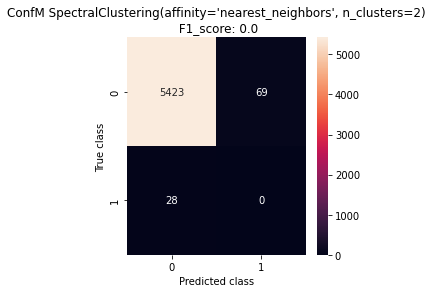

0    5470
1      50
dtype: int64


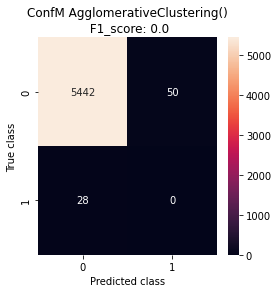

In [ ]:
from sklearn import metrics
# from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

# data = datasets.load_digits()
# X, y = X_test, y_test


algos = []
algos.append(KMeans(n_clusters=2, random_state=1))
algos.append(SpectralClustering(n_clusters=2, affinity='nearest_neighbors'))
algos.append(AgglomerativeClustering(n_clusters=2, affinity='euclidean'))

data = []
# fig, axes = plt.subplots(1, 3)

# subplot_kw=dict(projection="polar")
# axs[0, 0].plot(x, y)
# axs[1, 1].scatter(x, y)
# fig, axes = plt.subplots(1, 3)
for i, algo in enumerate(algos):
    # try:
    #   # r = algo.fit(X_train_stand).fit_predict(X_test)
    #   r = algo.fit(X_train_stand)
    #   r = r.predict(X_test1)

    # except AttributeError:
    r1 = algo.fit(X_test1)
    r = r1.labels_
  
      # r = algo.fit_predict(X_test1)
      # r2 = r2.labels_
      # print('Equal:', r1==r2)

    print(pd.Series(r).value_counts())
    data.append(metrics.f1_score(y_test, r))
    conf_matrix=metrics.confusion_matrix(pd.Series(list(np.array(y_test))), r)

    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title(f"ConfM {algo}\n F1_score: {round(metrics.f1_score(y_test, r), 5)}")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


# pd.DataFrame({'F1_score': [data[0], data[1], data[2]]},
#               index = ['KMeans', 'Spectral', 'Agglomerative'])


In [ ]:
pd.DataFrame({'F1_score': [data[0], data[1], data[2]]},
              index = ['KMeans', 'Spectral', 'Agglomerative'])

IndexError: ignored

In [ ]:
data

[0.009195402298850573]

# Архитектура и обучение

#### CNN, Linear

In [ ]:
class CNN_AE(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv1d(1, 32, kernel_size=7, stride=1, padding=3),
        nn.LeakyReLU(),
        nn.Dropout(0.2),
        nn.Conv1d(32, 64, kernel_size=7, stride=1, padding=3),
        nn.LeakyReLU(),
        nn.Dropout(0.2),
        nn.Conv1d(64, 2, kernel_size=7, stride=1, padding=3),
        nn.LeakyReLU(),
    )
    self.decoder = nn.Sequential(
        
        nn.ConvTranspose1d(2, 64, kernel_size=7, stride=1, padding=3),
        nn.LeakyReLU(),
        nn.Dropout(0.2),
        nn.ConvTranspose1d(64, 32, kernel_size=7, stride=1, padding=3),
        nn.LeakyReLU(),
        nn.Dropout(0.2),
        nn.ConvTranspose1d(32, 1, kernel_size=7, stride=1, padding=3),
    )

  def forward(self, sample):
    latent = self.encoder(sample)
    reconstructed = self.decoder(latent)
    return reconstructed

In [ ]:
class LinearAE(nn.Module):
    def __init__(self):
        super(LinearAE, self).__init__()

        self.flatten = nn.Flatten()
 
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(in_features=61, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=4),
            nn.ReLU(),
        )

        # mat1 and mat2 shapes cannot be multiplied (2048x20 and 1x64)
 
        # decoder 
        self.decoder = nn.Sequential(
            nn.Linear(in_features=4, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=16),
            nn.Linear(in_features=16, out_features=61),
            nn.Sigmoid()
        )



    def forward(self, x):
          # encoding
          x = self.flatten(x).float()
          latent_space = self.encoder(x) #.view(-1, 2, features)
          # decoding
          reconstruction = self.decoder(latent_space)
          return reconstruction

In [ ]:
n_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#выбор нужной модели
model = CNN_AE().to(device)
# model = LinearAE().to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=10)

loss_fn = F.mse_loss
# loss_fg = F.
# loss_fn = F.multilabel_margin_loss

train_losses = []
val_losses = []

for epoch in tqdm(range(n_epochs)):
    model.train()
    train_losses_per_epoch = []
    for i, X_batch in enumerate(train_loader):
        optimizer.zero_grad()
        # print(X_batch.shape)
        reconstructed = model(X_batch.to(device))
        # print(reconstructed.shape)
        loss = loss_fn(reconstructed, X_batch.to(device))
        loss.backward()
        optimizer.step()
        train_losses_per_epoch.append(loss.item())
    # scheduler.step()
    train_losses.append(np.mean(train_losses_per_epoch))
    print('traim_loss:', np.mean(train_losses_per_epoch))

    model.eval()
    val_losses_per_epoch = []
    with torch.no_grad():
        for X_batch in val_loader:
          reconstructed = model(X_batch.to(device))
          loss = loss_fn(reconstructed, X_batch.to(device))
          val_losses_per_epoch.append(loss.item())

    val_losses.append(np.mean(val_losses_per_epoch))
    print('val_loss:', np.mean(val_losses_per_epoch))

  0%|          | 0/20 [00:00<?, ?it/s]

traim_loss: 0.9376645003046308
val_loss: 0.7638655304908752
traim_loss: 0.5837723570210593
val_loss: 0.22696190575758615
traim_loss: 0.27236838000161306
val_loss: 0.14231611291567484
traim_loss: 0.19275184614317759
val_loss: 0.08522647619247437
traim_loss: 0.1495335932288851
val_loss: 0.07065310329198837
traim_loss: 0.12471510895660945
val_loss: 0.04507746919989586
traim_loss: 0.11010902268545968
val_loss: 0.04292730366190275
traim_loss: 0.10151986139161247
val_loss: 0.038452611615260444
traim_loss: 0.0946864230292184
val_loss: 0.03301036854585012
traim_loss: 0.08995351195335388
val_loss: 0.029799434666832287
traim_loss: 0.08656797238758632
val_loss: 0.028295045718550682
traim_loss: 0.08346016492162432
val_loss: 0.026983093470335007
traim_loss: 0.08123601227998734
val_loss: 0.025217393413186073
traim_loss: 0.07822427792208535
val_loss: 0.022942353039979935
traim_loss: 0.076921175633158
val_loss: 0.02090582934518655
traim_loss: 0.07431723390306745
val_loss: 0.02001986838877201
traim_los

In [ ]:
train_losses

[0.9454241054398673,
 0.5290517934731075,
 0.18635715969971248,
 0.12001193846975054,
 0.08549202659300395,
 0.06697265537721771,
 0.05598284995981625,
 0.04862583162529128,
 0.04371956044009754,
 0.04016887183700289,
 0.03758790929402624,
 0.035387286650283,
 0.03317088820040226,
 0.03137586984251227,
 0.029550961617912565]

In [ ]:
val_losses

[0.7663614153862,
 0.19184261560440063,
 0.09189582864443462,
 0.07992361982663472,
 0.05168918892741203,
 0.04224414502580961,
 0.03358077133695284,
 0.030012335628271103,
 0.027760004624724388,
 0.02575102572639783,
 0.023813166345159214,
 0.022329396257797878,
 0.020395837103327114,
 0.018829485401511192,
 0.017221073309580486]

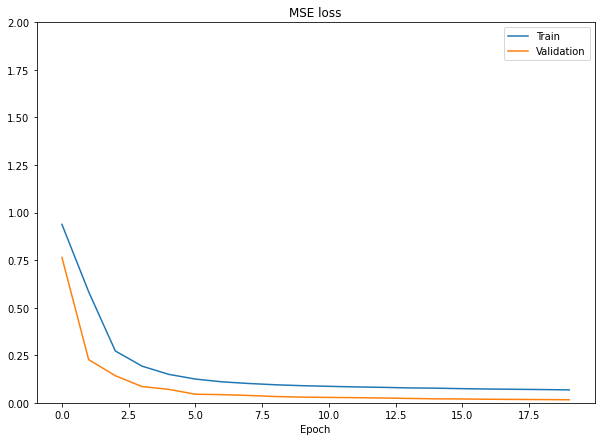

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(train_losses, label='Train')
plt.plot(np.arange(len(val_losses)), val_losses, label='Validation')

plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
#получаем лосс по каждой сесси в валидаицонной части датасета
# там где лосс большой, там и аномальные данные 
test_losses = []
with torch.no_grad():
  for batch in tqdm(test_loader):
    pred = model(batch.to(device)).cpu().numpy()
    mae = np.mean(np.abs(pred - batch.numpy()))
    # mse = mean_squared_error(pred.reshape(61), batch.numpy().reshape(61))
    test_losses.append(mae)

  0%|          | 0/5520 [00:00<?, ?it/s]

In [ ]:
pd.Series(test_losses).quantile(0.999)

2.386963992357256

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


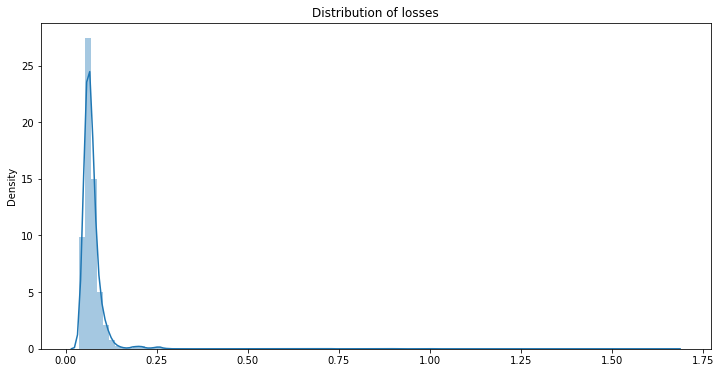

In [ ]:
# lower_threshold = 0.0
# upper_threshold = 0.3
plt.figure(figsize=(12,6))
plt.title('Distribution of losses')
sns.distplot(test_losses,bins=100,kde=True)
# plt.axvline(upper_threshold, 0.0, 10, color='r')
# plt.axvline(lower_threshold, 0.0, 10, color='b')

Text(0.5, 1.0, 'Scatterplot with 999-percentile threshold')

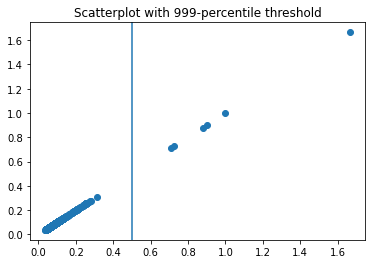

In [ ]:
loss_sc = []
for i in test_losses:
    loss_sc.append((i,i))
plt.scatter(*zip(*loss_sc))
plt.axvline(pd.Series(test_losses).quantile(0.999), 0.0, 1)
plt.title('Scatterplot with 999-percentile threshold')

In [ ]:
pd.Series(np.array(test_losses)).describe()

count    5520.000000
mean        0.087216
std         0.042434
min         0.045205
25%         0.068179
50%         0.080022
75%         0.093013
max         0.964183
dtype: float64

In [ ]:
thr_val = pd.Series(test_losses).quantile(0.999)
print(thr_val)
y_pred = pd.Series(test_losses).apply(lambda x: 1 if x > thr_val else 0)

0.5019088817837541


In [ ]:
y_pred.value_counts()

0    5514
1       6
dtype: int64

In [ ]:
y_test1.value_counts()

0    5487
1      33
Name: y, dtype: int64

In [ ]:
print(classification_report(y_pred, pd.Series(list(np.array(y_test1)))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5514
           1       0.18      1.00      0.31         6

    accuracy                           1.00      5520
   macro avg       0.59      1.00      0.65      5520
weighted avg       1.00      1.00      1.00      5520



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred, pd.Series(list(np.array(y_test1))))

0.9141276750090679

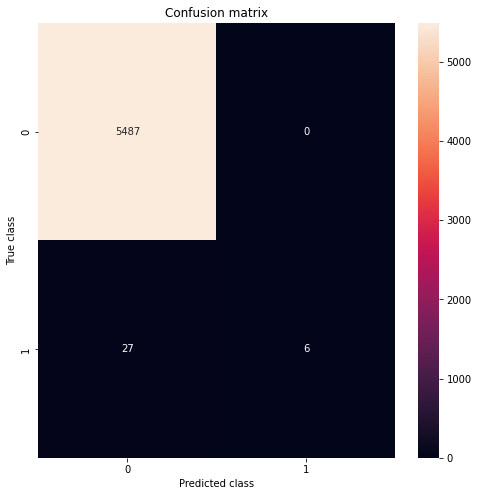

In [ ]:
conf_matrix = confusion_matrix( pd.Series(list(np.array(y_test1))), y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

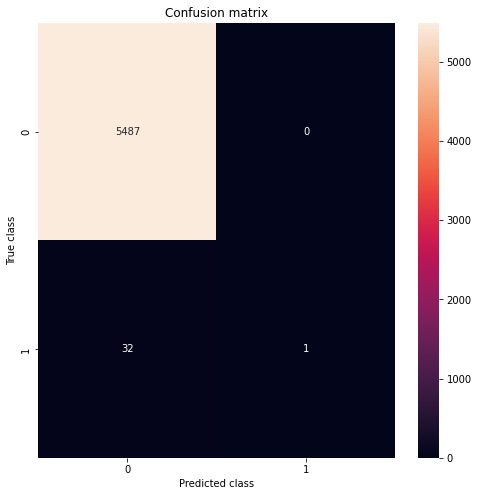

In [ ]:

conf_matrix = confusion_matrix( pd.Series(list(np.array(y_test1)))    , y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### VAE (linear, cnn)

In [ ]:
from numpy.ma.core import shape
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        # <определите архитектуры encoder и decoder
        # помните, у encoder должны быть два "хвоста", 
        # т.е. encoder должен кодировать картинку в 2 переменные -- mu и logsigma>

        latent_dim = 4


        #ДЛЯ LINEAR
        self.encoder_1layer = nn.Linear(61, 32)

        self.encoder_2layer_Mu = nn.Linear(32, latent_dim)
        self.encoder_2layer_Logsigma = nn.Linear(32, latent_dim)

        self.decoder_1layer = nn.Linear(latent_dim, 32)
        self.decoder_2layer = nn.Linear(32, 61)


        #ДЛЯ CNN
        # self.flattening = nn.Flatten()

        # self.encoder_1layer = nn.Conv1d(1, 32, kernel_size=7, stride=1, padding=3)
        # self.encoder_2layer = nn.Conv1d(32, 64, kernel_size=7, stride=1, padding=3)

        # self.encoder_2layer_Mu = nn.Conv1d(64, latent_dim, kernel_size=7, stride=1, padding=3)
        # self.encoder_2layer_Logsigma = nn.Conv1d(64, latent_dim, kernel_size=7, stride=1, padding=3)


        # self.decoder_1layer = nn.ConvTranspose1d(latent_dim, 64, kernel_size=7, stride=1, padding=3)
        # self.decoder_2layer = nn.ConvTranspose1d(64, 32, kernel_size=7, stride=1, padding=3)
        # self.decoder_3layer = nn.ConvTranspose1d(32, 1, kernel_size=7, stride=1, padding=3)

    


    def encode(self, x):

      # <реализуйте forward проход энкодера
      # в качестве возвращаемых переменных -- mu и logsigma>
        # x = self.flattening(x)
        x = self.encoder_1layer(x)
        x = torch.relu(x)

        # x = self.encoder_2layer(x)
        # x = torch.relu(x)


        mu = self.encoder_2layer_Mu(x)
        mu = torch.relu(mu)


        logsigma = self.encoder_2layer_Logsigma(x)
        logsigma = torch.relu(logsigma)
          
        return mu, logsigma
    

    def forward(self, x):
        # <используя encode и decode, реализуйте forward проход автоэнкодера
        # в качестве ваозвращаемых переменных -- mu, logsigma и reconstruction>

        mu, logsigma = self.encode(x)

        std = torch.exp(0.5 * logsigma) # standard deviation

        eps = torch.randn_like(std)

        x1 = mu + (eps * std) 


        #Декодер:
        # print(type(x1))

        z = self.decoder_1layer(torch.relu(x1))
        z = torch.relu(z)

        # z = self.decoder_2layer(z)
        # z = torch.relu(z)

        z = self.decoder_2layer(z)
        reconstruction = torch.sigmoid(z)

        return mu, logsigma, reconstruction

In [ ]:
def KL_divergence(mu, logsigma):
    """
    часть функции потерь, которая отвечает за "близость" латентных представлений разных людей
    """
    loss = -0.5 *torch.sum(1 + logsigma - mu**2 - logsigma.exp())
    return loss

def log_likelihood(x, reconstruction):
    """
    часть функции потерь, которая отвечает за качество реконструкции (как mse в обычном autoencoder)
    """
    # loss = nn.BCELoss(reduction='sum')
    loss = nn.BCELoss()
    return loss(reconstruction, x)

def loss_vae(x, mu, logsigma, reconstruction):
    return KL_divergence(mu, logsigma) + log_likelihood(x, reconstruction)

In [ ]:
def vae_train(model, n_epochs, loss_fn, optimizer):
  train_losses = []
  val_losses = []
  model = model.to(device)
  for epoch in tqdm(range(n_epochs)):
      model.train()
      train_losses_per_epoch = []
      for i, X_batch in tqdm(enumerate(train_loader)):
          X_batch = X_batch.to(device)
          X_batch = X_batch.reshape(-1, 61)

          optimizer.zero_grad()

          mu, logsigma, reconstruction = model(X_batch)

          loss = loss_fn(X_batch, mu, logsigma, reconstruction)
          # print(loss)
          loss.backward()
          optimizer.step()
          train_losses_per_epoch.append(loss.item())

      # scheduler.step()
      train_losses.append(np.mean(train_losses_per_epoch))
      print('train_epoch_loss:', np.mean(train_losses_per_epoch))
      print('latent_mu mean and std:', mu.mean().item(), mu.std().item())
      print('latent_logsigma mean and std:', logsigma.mean().item(), logsigma.std().item())
      
      model.eval()
      val_losses_per_epoch = []
      with torch.no_grad():
          for X_batch_v in tqdm(test_loader):
            X_batch_v = X_batch_v.to(device)
            X_batch_v = X_batch_v.reshape(-1, 61)
            mu_v, logsigma_v, reconstruction_v = model(X_batch_v)
            loss = loss_fn(X_batch_v, mu_v, logsigma_v, reconstruction_v)
            val_losses_per_epoch.append(loss.item())
      val_losses.append(np.mean(val_losses_per_epoch))
      print('val_epoch_loss:', np.mean(val_losses_per_epoch))



      plt.figure(figsize=(14, 6))
      plt.title('Metrics')
      plt.plot(train_losses, label='train_loss')
      plt.plot(val_losses, label='val_loss')
      plt.legend()
      plt.show()
  return train_losses, val_losses

In [ ]:
criterion_vae = loss_vae

var_autoencoder = VAE()

optimizer_vae = torch.optim.Adam(var_autoencoder.parameters(), lr=0.0001)

  0%|          | 0/20 [00:00<?, ?it/s]

0it [00:00, ?it/s]

train_epoch_loss: 376.40826742989674
latent_mu mean and std: 0.15234115719795227 0.20806871354579926
latent_logsigma mean and std: 0.13949351012706757 0.1597709059715271


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.902931987537422


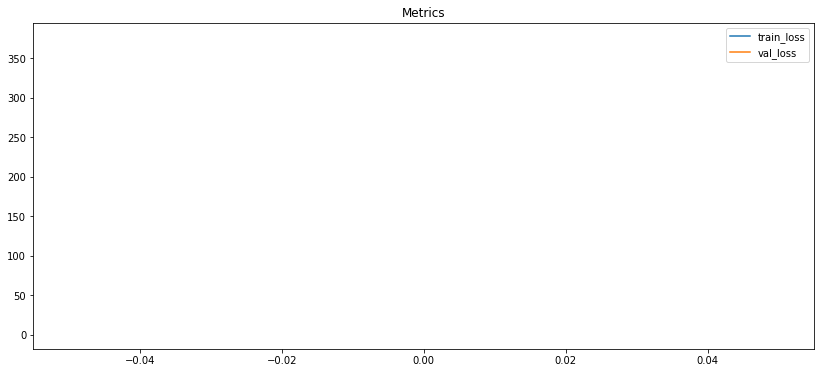

0it [00:00, ?it/s]

train_epoch_loss: 352.4774900163923
latent_mu mean and std: 0.14690913259983063 0.2019207924604416
latent_logsigma mean and std: 0.1350054293870926 0.15587715804576874


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8857546936126722


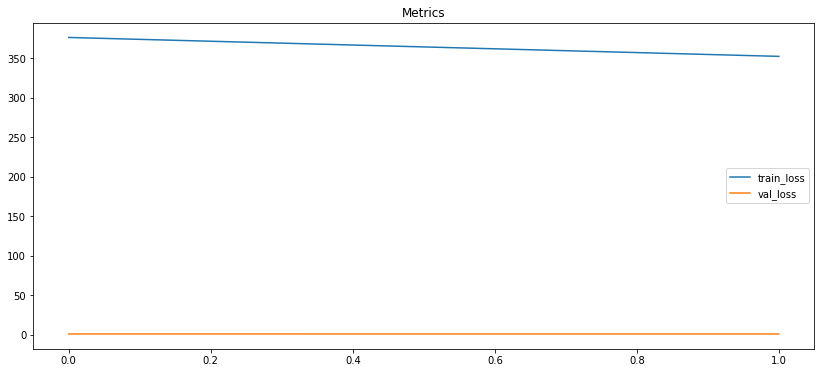

0it [00:00, ?it/s]

train_epoch_loss: 330.42282431466236
latent_mu mean and std: 0.14168614149093628 0.19597278535366058
latent_logsigma mean and std: 0.13071636855602264 0.15208598971366882


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8696769590071146


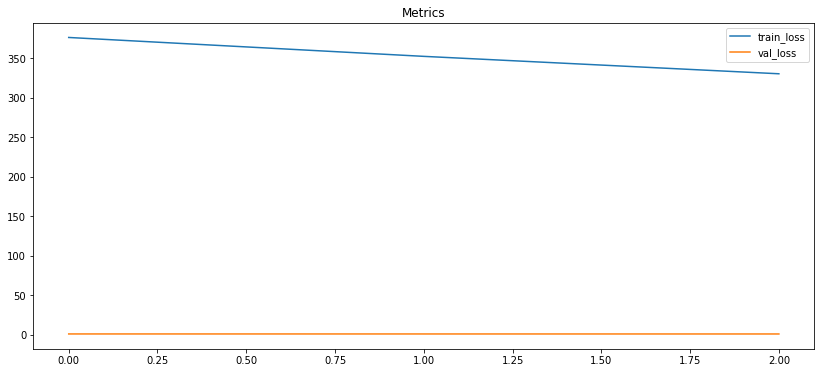

0it [00:00, ?it/s]

train_epoch_loss: 309.8415952410017
latent_mu mean and std: 0.13667568564414978 0.190212681889534
latent_logsigma mean and std: 0.12659838795661926 0.14841890335083008


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8556257620669794


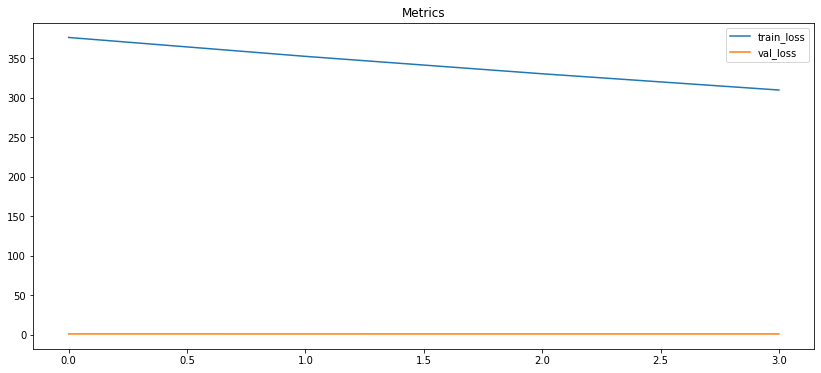

0it [00:00, ?it/s]

train_epoch_loss: 290.63680158342635
latent_mu mean and std: 0.13190551102161407 0.18461047112941742
latent_logsigma mean and std: 0.12265274673700333 0.1448637843132019


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.841479936350083


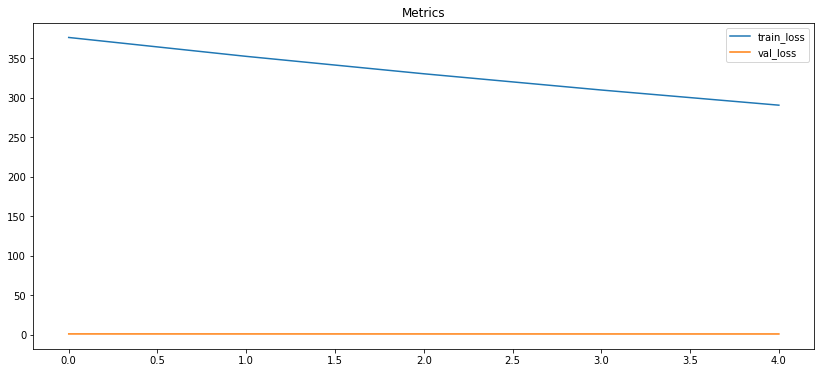

0it [00:00, ?it/s]

train_epoch_loss: 272.7167303902762
latent_mu mean and std: 0.12733295559883118 0.17918077111244202
latent_logsigma mean and std: 0.118892602622509 0.1413998156785965


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8281575799312281


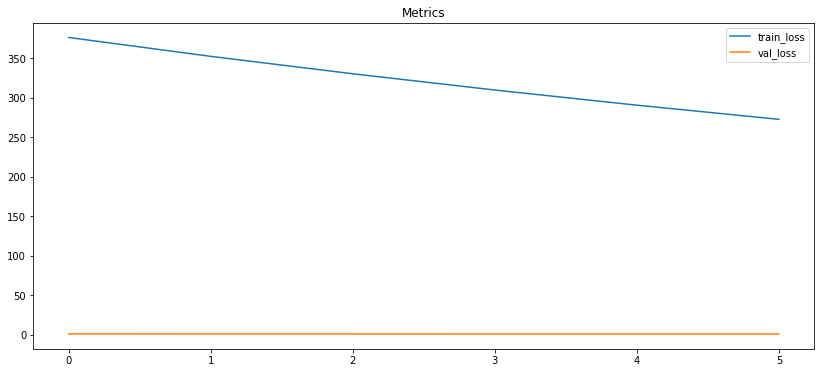

0it [00:00, ?it/s]

train_epoch_loss: 255.99691009521484
latent_mu mean and std: 0.12294824421405792 0.17392581701278687
latent_logsigma mean and std: 0.11527019739151001 0.1380544751882553


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8162416845344115


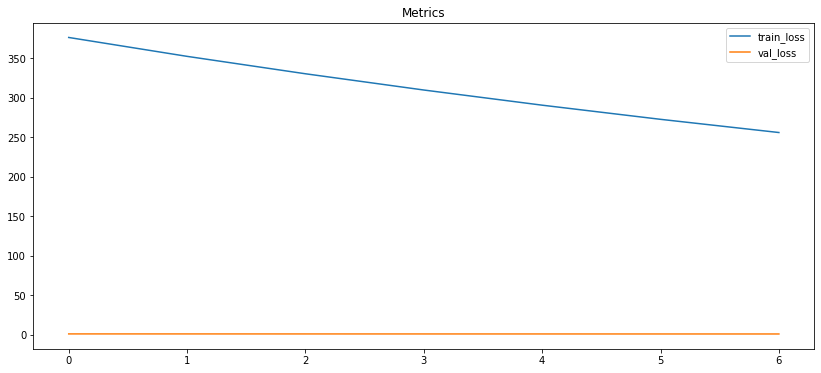

0it [00:00, ?it/s]

train_epoch_loss: 240.3878446306501
latent_mu mean and std: 0.11874334514141083 0.16882458329200745
latent_logsigma mean and std: 0.11179807782173157 0.1347959041595459


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.8041482086036948


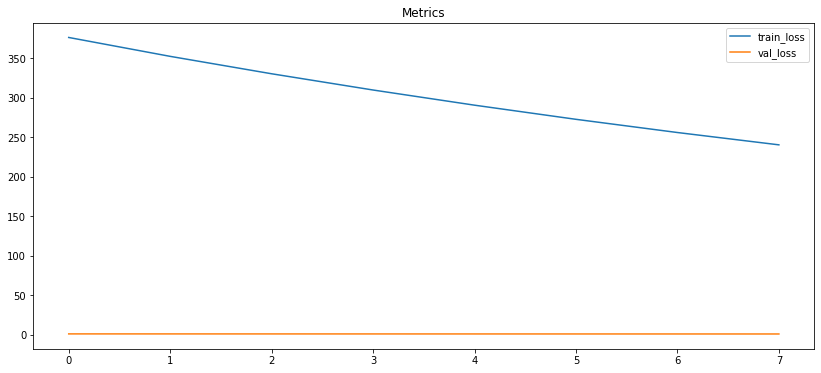

0it [00:00, ?it/s]

train_epoch_loss: 225.79989515032088
latent_mu mean and std: 0.1146794855594635 0.1638888269662857
latent_logsigma mean and std: 0.10845190286636353 0.13162003457546234


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.792076035146264


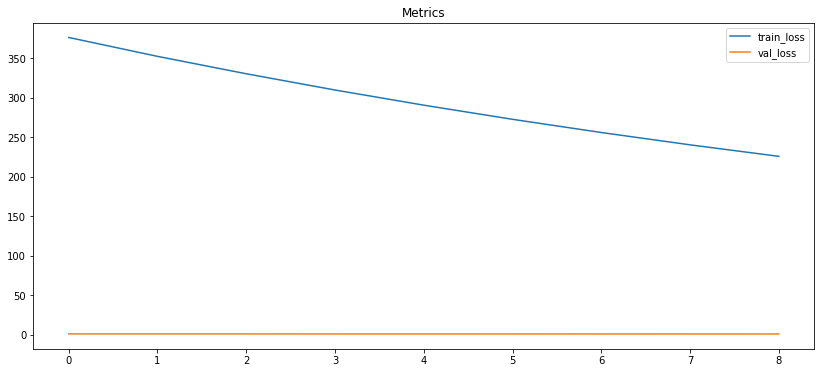

0it [00:00, ?it/s]

train_epoch_loss: 212.15138789585657
latent_mu mean and std: 0.11074744910001755 0.15910232067108154
latent_logsigma mean and std: 0.10521989315748215 0.12853968143463135


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7817365738198809


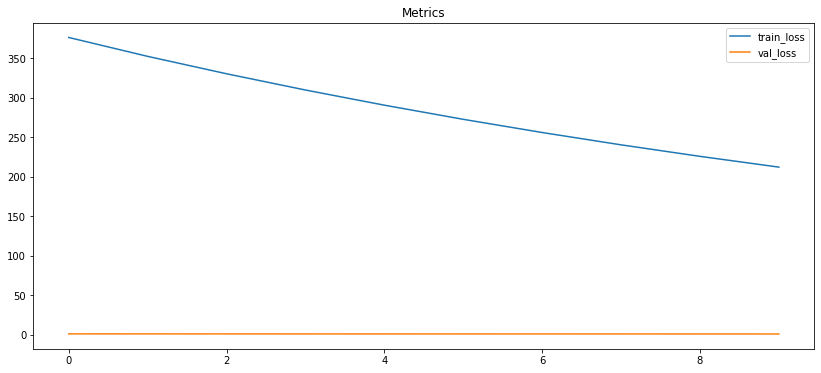

0it [00:00, ?it/s]

train_epoch_loss: 199.37027958461218
latent_mu mean and std: 0.10695169866085052 0.15446658432483673
latent_logsigma mean and std: 0.10208884626626968 0.12554025650024414


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7714199372067831


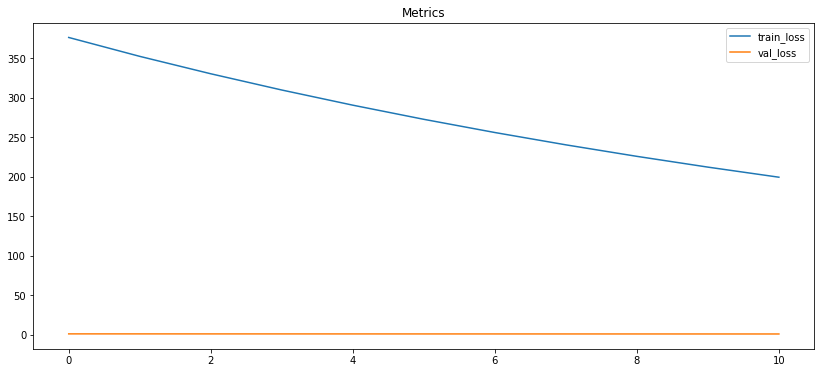

0it [00:00, ?it/s]

train_epoch_loss: 187.38821956089564
latent_mu mean and std: 0.10328154265880585 0.14996054768562317
latent_logsigma mean and std: 0.0990457609295845 0.12262807786464691


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7614600737187741


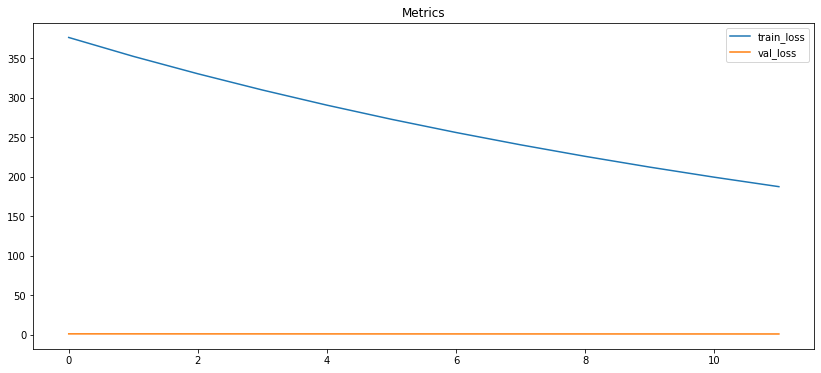

0it [00:00, ?it/s]

train_epoch_loss: 176.1474004473005
latent_mu mean and std: 0.0997326672077179 0.14558404684066772
latent_logsigma mean and std: 0.09609095007181168 0.11980642378330231


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7519655638036953


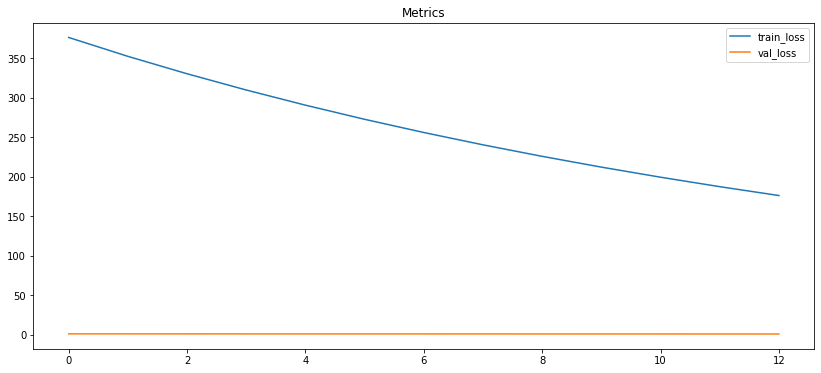

0it [00:00, ?it/s]

train_epoch_loss: 165.59350367954798
latent_mu mean and std: 0.0963013619184494 0.14132459461688995
latent_logsigma mean and std: 0.09322389960289001 0.1170654296875


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7428944076532903


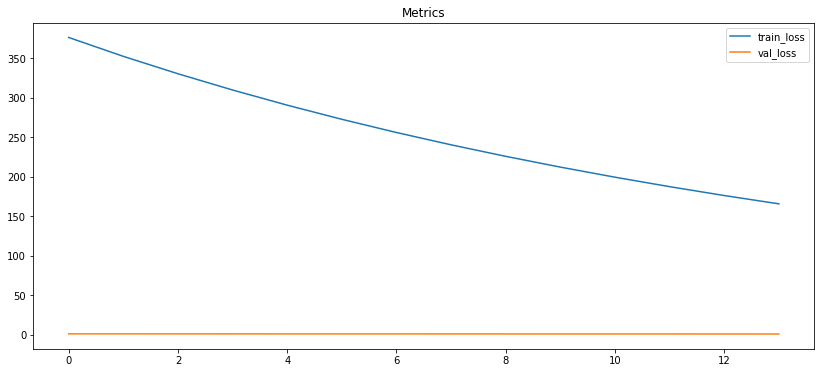

0it [00:00, ?it/s]

train_epoch_loss: 155.67880358014787
latent_mu mean and std: 0.09297893941402435 0.1371956318616867
latent_logsigma mean and std: 0.09042952954769135 0.11439209431409836


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7352696157047066


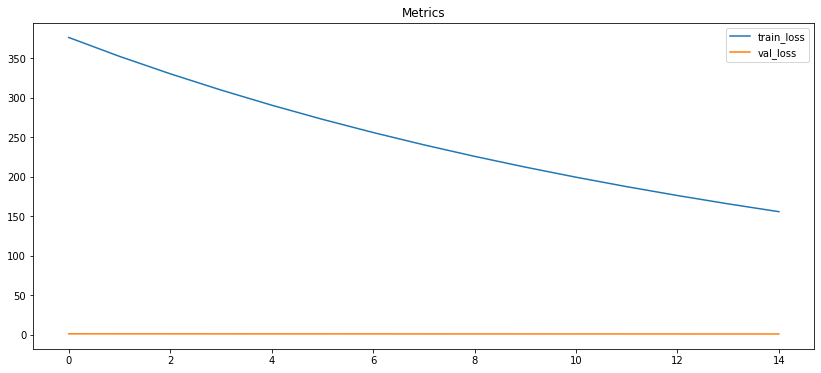

0it [00:00, ?it/s]

train_epoch_loss: 146.35752596173967
latent_mu mean and std: 0.08975918591022491 0.13317736983299255
latent_logsigma mean and std: 0.08772197365760803 0.11177346110343933


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.727010475333942


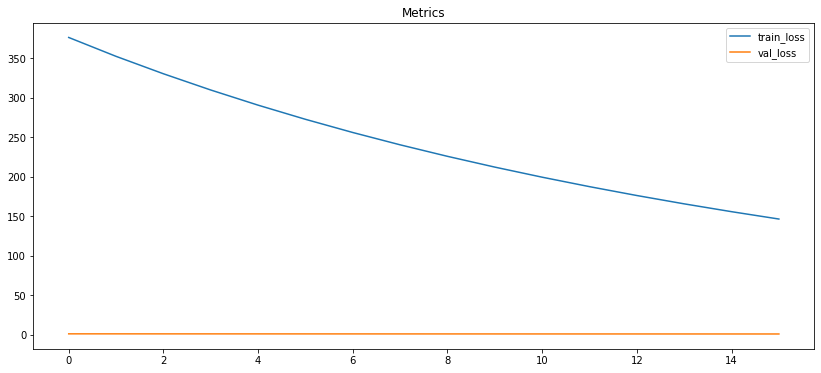

0it [00:00, ?it/s]

train_epoch_loss: 137.59192276000977
latent_mu mean and std: 0.08663638681173325 0.12926745414733887
latent_logsigma mean and std: 0.08508147299289703 0.10922382026910782


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7188811563306312


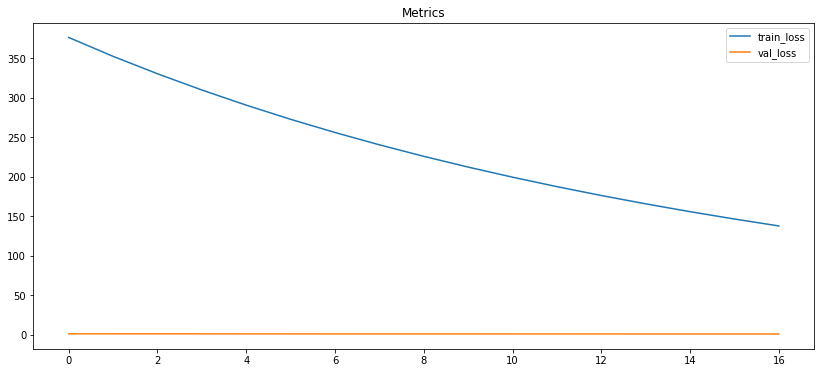

0it [00:00, ?it/s]

train_epoch_loss: 129.34710311889648
latent_mu mean and std: 0.0835987851023674 0.12547387182712555
latent_logsigma mean and std: 0.08251015841960907 0.1067311242222786


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7112224107891645


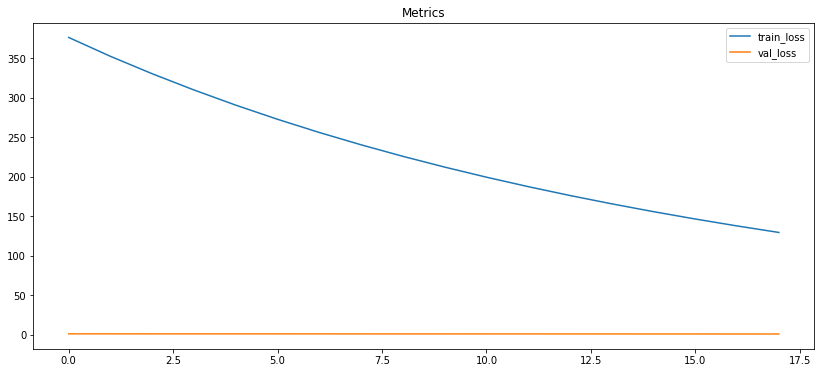

0it [00:00, ?it/s]

train_epoch_loss: 121.5863870893206
latent_mu mean and std: 0.0806429535150528 0.12177618592977524
latent_logsigma mean and std: 0.08000326156616211 0.10428325086832047


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7040591112155791


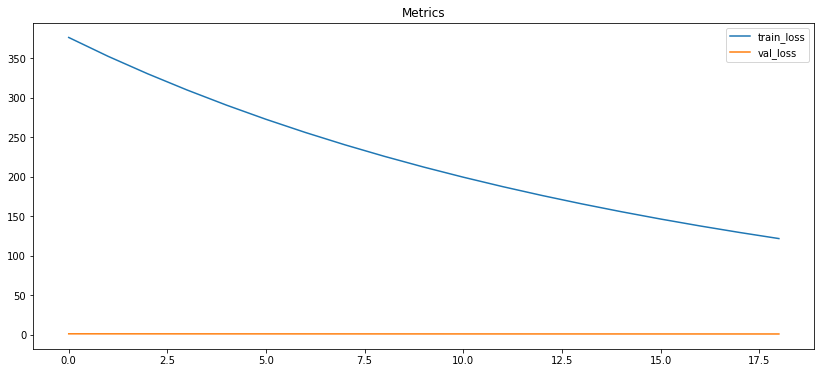

0it [00:00, ?it/s]

train_epoch_loss: 114.28252056666783
latent_mu mean and std: 0.0777595043182373 0.1181797906756401
latent_logsigma mean and std: 0.07754622399806976 0.1018892303109169


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6974142787195202


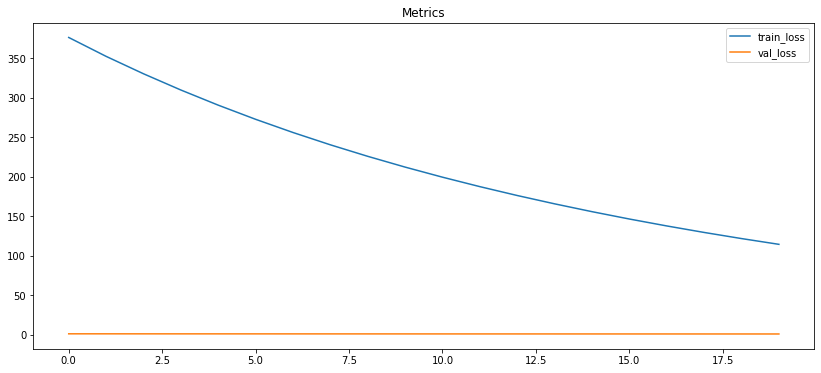

([376.40826742989674,
  352.4774900163923,
  330.42282431466236,
  309.8415952410017,
  290.63680158342635,
  272.7167303902762,
  255.99691009521484,
  240.3878446306501,
  225.79989515032088,
  212.15138789585657,
  199.37027958461218,
  187.38821956089564,
  176.1474004473005,
  165.59350367954798,
  155.67880358014787,
  146.35752596173967,
  137.59192276000977,
  129.34710311889648,
  121.5863870893206,
  114.28252056666783],
 [0.902931987537422,
  0.8857546936126722,
  0.8696769590071146,
  0.8556257620669794,
  0.841479936350083,
  0.8281575799312281,
  0.8162416845344115,
  0.8041482086036948,
  0.792076035146264,
  0.7817365738198809,
  0.7714199372067831,
  0.7614600737187741,
  0.7519655638036953,
  0.7428944076532903,
  0.7352696157047066,
  0.727010475333942,
  0.7188811563306312,
  0.7112224107891645,
  0.7040591112155791,
  0.6974142787195202])

In [ ]:
vae_train(var_autoencoder,20 , criterion_vae,  optimizer_vae)

Text(0.5, 1.0, 'Scatterplot with 999-percentile threshold')

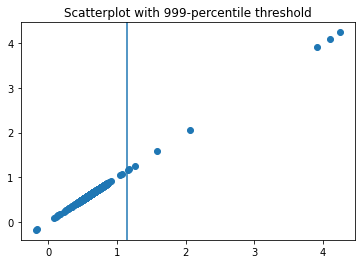

In [ ]:
loss_sc = []
for i in test_losses:
    loss_sc.append((i,i))

plt.scatter(*zip(*loss_sc))
plt.axvline(pd.Series(test_losses).quantile(0.9987), 0.0, 1)
plt.title('Scatterplot with 999-percentile threshold')

In [ ]:
thr_val = pd.Series(test_losses).quantile(0.999)
print(thr_val)
y_pred = pd.Series(test_losses).apply(lambda x: 1 if x > 1.12 else 0)

1.2170234251022847


In [ ]:
y_pred.value_counts()

0    5512
1       8
dtype: int64

In [ ]:
print(classification_report(y_pred, pd.Series(list(np.array(y_test1)))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5512
           1       0.24      1.00      0.39         8

    accuracy                           1.00      5520
   macro avg       0.62      1.00      0.69      5520
weighted avg       1.00      1.00      1.00      5520



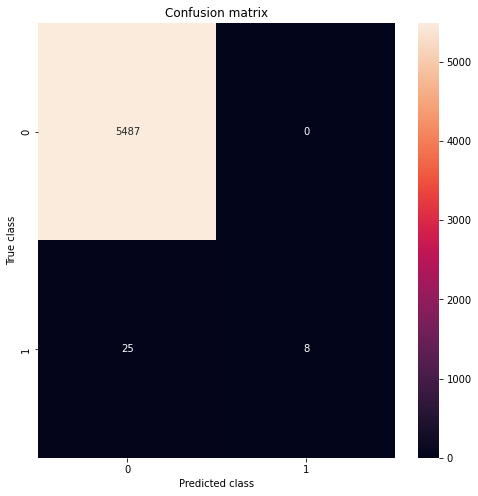

In [ ]:
conf_matrix = confusion_matrix( pd.Series(list(np.array(y_test1))) ,y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Denoising + sparse(l2) + VAE

In [ ]:

class NoiseVAE(nn.Module):
    def __init__(self):
        super().__init__()

        latent_dim = 2

        self.encoder_1layer = nn.Linear(61, 32)

        self.encoder_2layer_Mu = nn.Linear(32, latent_dim)
        self.encoder_2layer_Logsigma = nn.Linear(32, latent_dim)

        self.decoder_1layer = nn.Linear(latent_dim, 32)
        self.decoder_2layer = nn.Linear(32, 61)


    def encode(self, x):
        x = self.encoder_1layer(x)
        x = torch.relu(x)

        mu = self.encoder_2layer_Mu(x)
        mu = torch.relu(mu)

        logsigma = self.encoder_2layer_Logsigma(x)
        logsigma = torch.relu(logsigma)
          
        return mu, logsigma
    

    def forward(self, x):
        
        #энкодер
        mu, logsigma = self.encode(x)

        #параметры распределения
        std = torch.exp(0.5 * logsigma) 
        eps = torch.randn_like(std)
        x1 = mu + (eps * std) 

        #декодер
        z = self.decoder_1layer(torch.relu(x1))
        z = torch.relu(z)
        z = self.decoder_2layer(z)
        reconstruction = torch.sigmoid(z)

        return mu, logsigma, reconstruction

In [ ]:
def KL_divergence(mu, logsigma):
    """
    часть функции потерь, которая отвечает за "близость" латентных представлений
    """
    loss = -0.5 *torch.sum(1 + logsigma - mu**2 - logsigma.exp())
    return loss

def log_likelihood(x, reconstruction):
    """
    часть функции потерь, которая отвечает за качество реконструкции (как mse в обычном autoencoder)
    """
    # loss = nn.BCELoss(reduction='sum')
    loss = nn.BCELoss()
    return loss(reconstruction, x)

def loss_vae(x, mu, logsigma, reconstruction):
    return KL_divergence(mu, logsigma) + log_likelihood(x, reconstruction)

In [ ]:
#шум в виде нормального распределения
noise = np.random.normal(0,0.3,61)

def nvae_train(model, n_epochs, loss_fn, optimizer):
  train_losses = []
  val_losses = []
  model = model.to(device)
  for epoch in tqdm(range(n_epochs)):
      model.train()
      train_losses_per_epoch = []
      for i, X_batch in tqdm(enumerate(train_loader)):
          X_batch = X_batch.to(device) + torch.Tensor(noise)
          X_batch = X_batch.reshape(-1, 61)

          optimizer.zero_grad()

          mu, logsigma, reconstruction = model(X_batch)

          loss = loss_fn(X_batch, mu, logsigma, reconstruction)
          # print(loss)
          loss.backward()
          optimizer.step()
          train_losses_per_epoch.append(loss.item())

      # scheduler.step()
      train_losses.append(np.mean(train_losses_per_epoch))
      print('train_epoch_loss:', np.mean(train_losses_per_epoch))
      print('latent_mu mean and std:', mu.mean().item(), mu.std().item())
      print('latent_logsigma mean and std:', logsigma.mean().item(), logsigma.std().item())
      
      model.eval()
      val_losses_per_epoch = []
      with torch.no_grad():
          for X_batch_v in tqdm(test_loader):
            X_batch_v = X_batch_v.to(device)
            X_batch_v = X_batch_v.reshape(-1, 61)
            mu_v, logsigma_v, reconstruction_v = model(X_batch_v)
            loss = loss_fn(X_batch_v, mu_v, logsigma_v, reconstruction_v)
            val_losses_per_epoch.append(loss.item())
      val_losses.append(np.mean(val_losses_per_epoch))
      print('val_epoch_loss:', np.mean(val_losses_per_epoch))



      plt.figure(figsize=(14, 6))
      plt.title('Metrics')
      plt.plot(train_losses, label='train_loss')
      plt.plot(val_losses, label='val_loss')
      plt.legend()
      plt.show()
  return train_losses, val_losses

In [ ]:
criterion_vae = loss_vae

nvar_autoencoder = NoiseVAE()

optimizer_vae = torch.optim.Adam(nvar_autoencoder.parameters(), lr=0.0001, weight_decay=0.005)

  0%|          | 0/20 [00:00<?, ?it/s]

0it [00:00, ?it/s]

train_epoch_loss: 37.540626117161345
latent_mu mean and std: 0.04370206594467163 0.1245310977101326
latent_logsigma mean and std: 0.016327206045389175 0.09941715747117996


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7363884252374587


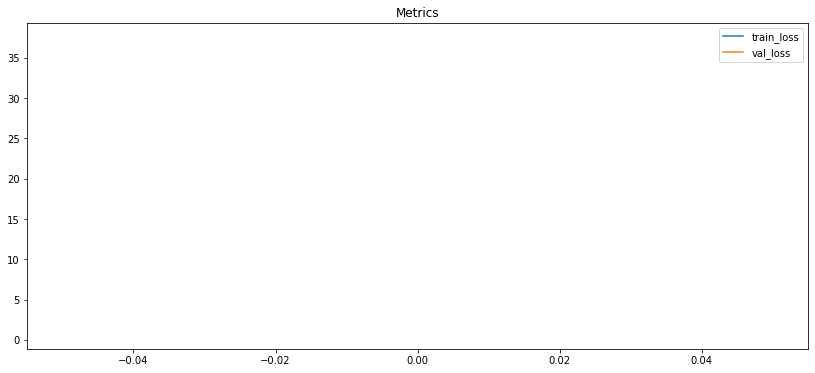

0it [00:00, ?it/s]

train_epoch_loss: 31.209425245012557
latent_mu mean and std: 0.03860711678862572 0.11618117988109589
latent_logsigma mean and std: 0.014559757895767689 0.08943933993577957


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7320506715364214


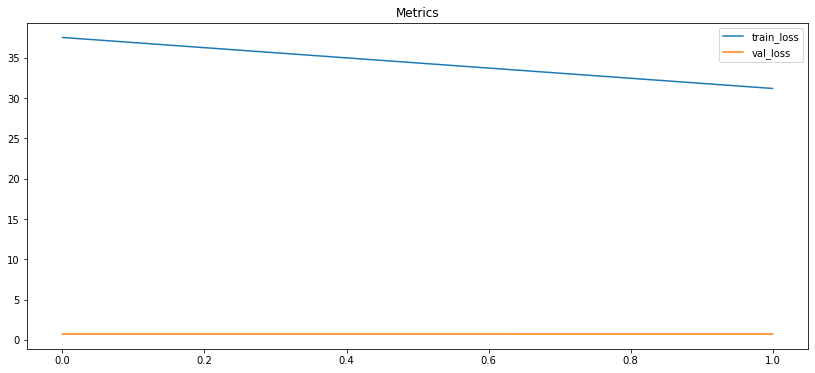

0it [00:00, ?it/s]

train_epoch_loss: 25.934685162135533
latent_mu mean and std: 0.03386940062046051 0.10814501345157623
latent_logsigma mean and std: 0.012974719516932964 0.08041021972894669


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7275552340607713


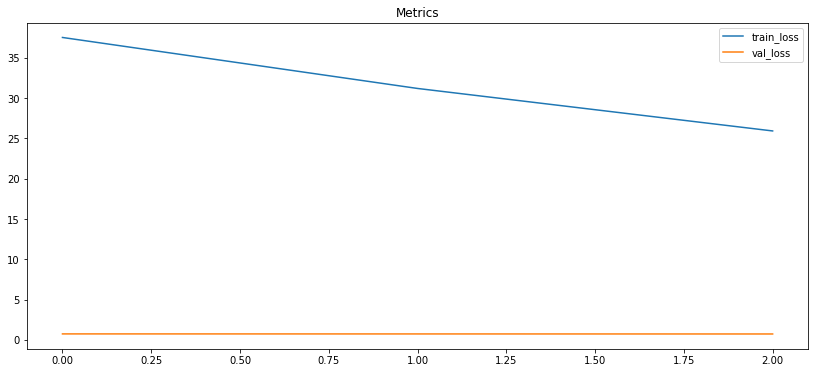

0it [00:00, ?it/s]

train_epoch_loss: 21.48539434160505
latent_mu mean and std: 0.029431307688355446 0.1000424176454544
latent_logsigma mean and std: 0.011583403684198856 0.07238547503948212


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7238064144184624


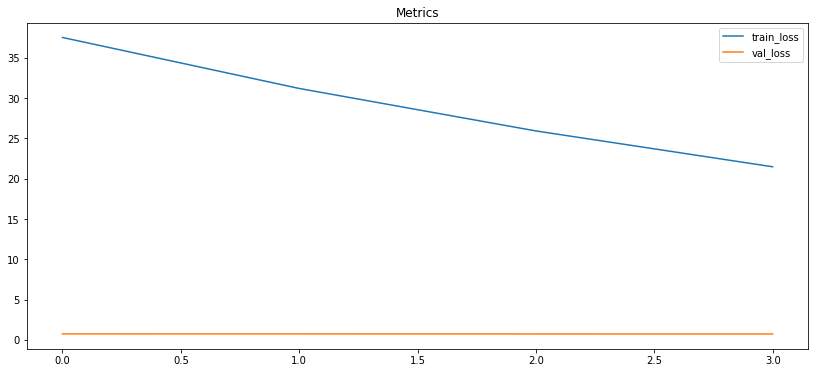

0it [00:00, ?it/s]

train_epoch_loss: 17.72185434613909
latent_mu mean and std: 0.025395037606358528 0.0917937383055687
latent_logsigma mean and std: 0.010360723361372948 0.06533512473106384


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7200061074849488


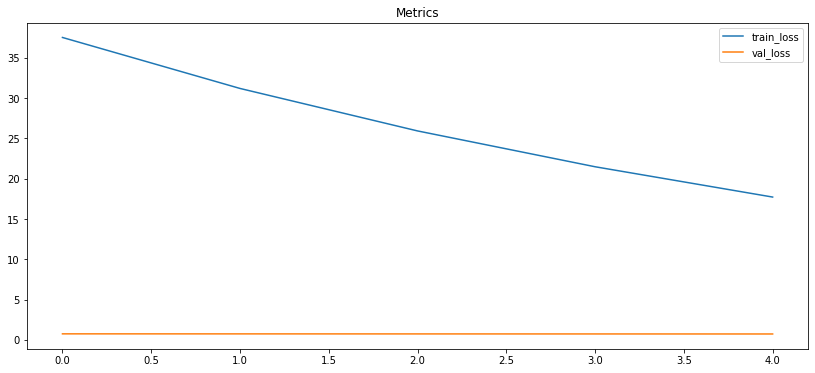

0it [00:00, ?it/s]

train_epoch_loss: 14.489146845681327
latent_mu mean and std: 0.02171977609395981 0.08287825435400009
latent_logsigma mean and std: 0.009293783456087112 0.05905481055378914


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7162526082085526


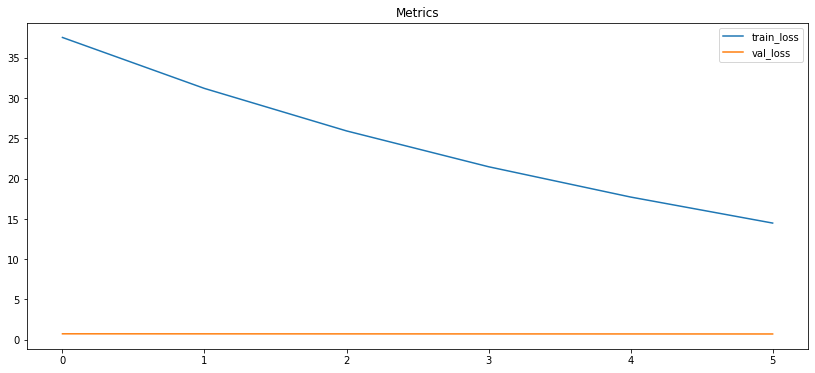

0it [00:00, ?it/s]

train_epoch_loss: 11.738544532230922
latent_mu mean and std: 0.018486887216567993 0.07379885762929916
latent_logsigma mean and std: 0.00832622405141592 0.0535508468747139


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7130918523863606


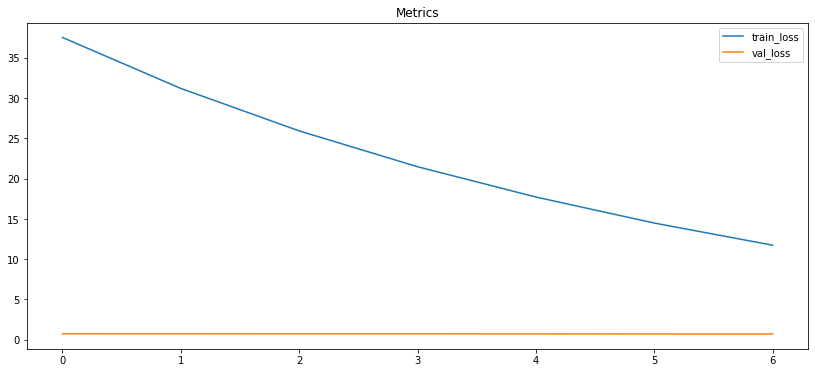

0it [00:00, ?it/s]

train_epoch_loss: 9.439456803458077
latent_mu mean and std: 0.01570669747889042 0.0650731697678566
latent_logsigma mean and std: 0.007471173536032438 0.04879064857959747


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7101897875521926


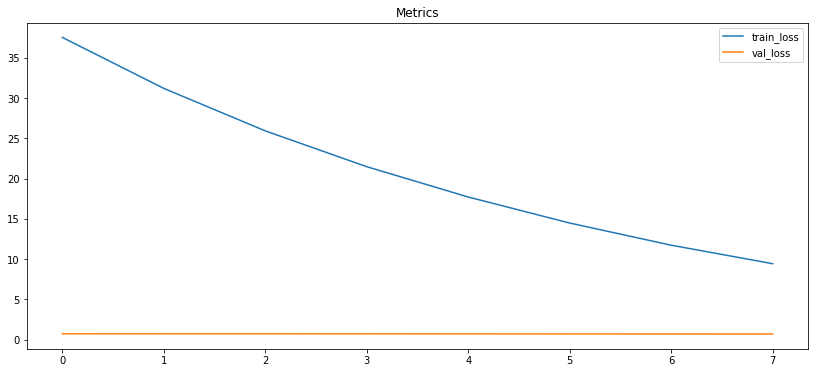

0it [00:00, ?it/s]

train_epoch_loss: 7.551230328423636
latent_mu mean and std: 0.01328218262642622 0.05679471418261528
latent_logsigma mean and std: 0.006720403209328651 0.04464180767536163


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7071105921721976


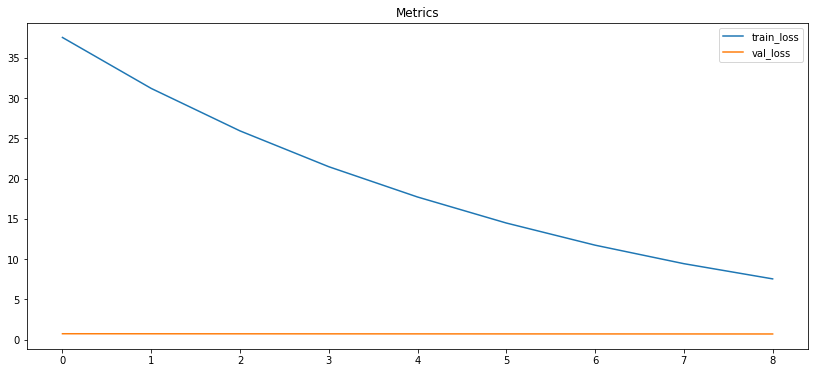

0it [00:00, ?it/s]

train_epoch_loss: 6.0297121320452005
latent_mu mean and std: 0.011204881593585014 0.04899873957037926
latent_logsigma mean and std: 0.006071033887565136 0.040879130363464355


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7046028844904209


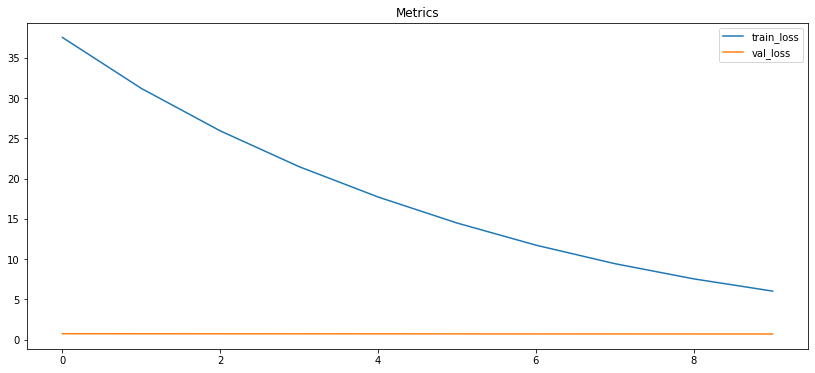

0it [00:00, ?it/s]

train_epoch_loss: 4.8125381129128595
latent_mu mean and std: 0.009455777704715729 0.04193168506026268
latent_logsigma mean and std: 0.005485516041517258 0.03741796687245369


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.7020429096036199


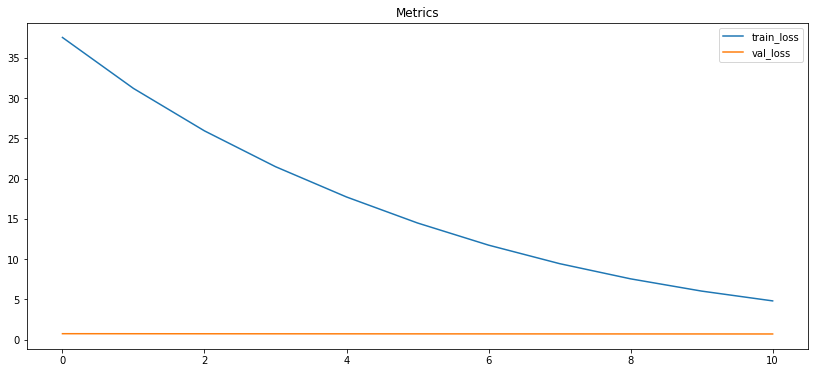

0it [00:00, ?it/s]

train_epoch_loss: 3.857087646211897
latent_mu mean and std: 0.007967920042574406 0.035577189177274704
latent_logsigma mean and std: 0.0049509285017848015 0.03420286625623703


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.699519266144953


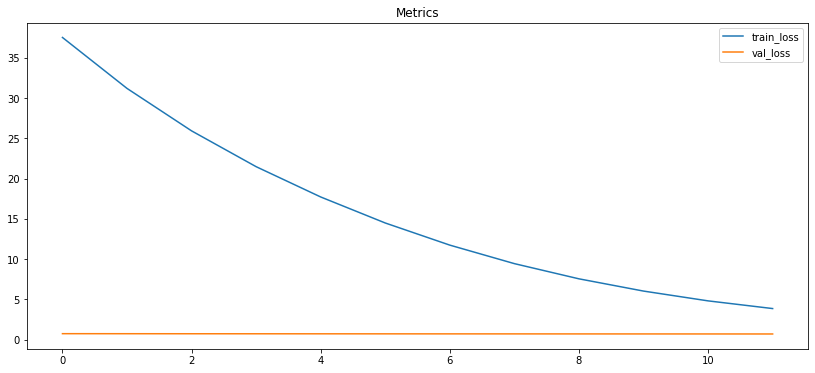

0it [00:00, ?it/s]

train_epoch_loss: 3.116597448076521
latent_mu mean and std: 0.006718890741467476 0.029923442751169205
latent_logsigma mean and std: 0.004472811706364155 0.031180281192064285


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6975877083783997


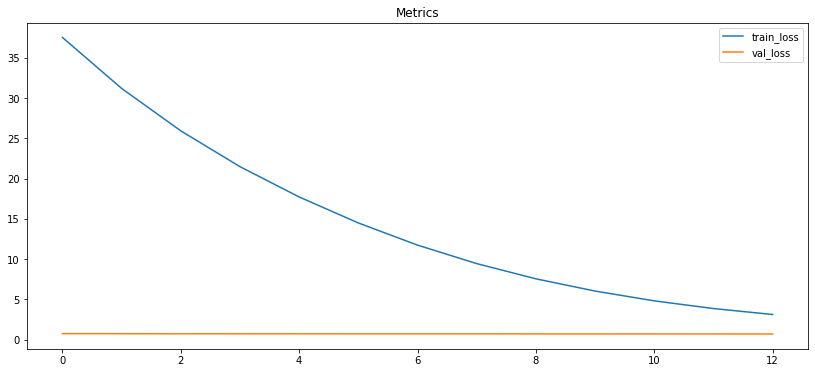

0it [00:00, ?it/s]

train_epoch_loss: 2.5492728097098216
latent_mu mean and std: 0.005643544252961874 0.02480521984398365
latent_logsigma mean and std: 0.004035068675875664 0.02838038094341755


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6949426469379577


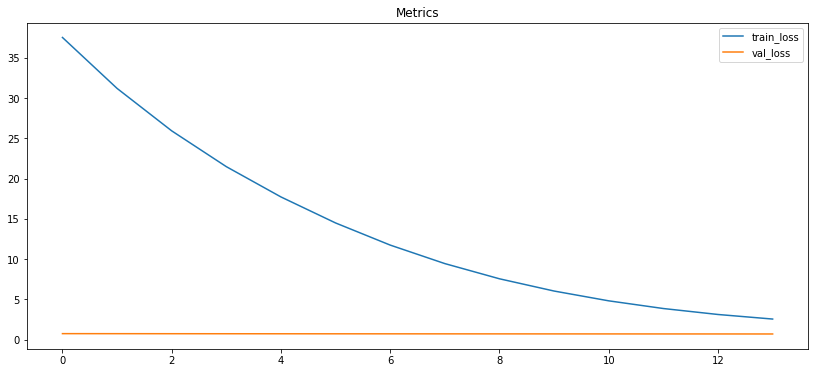

0it [00:00, ?it/s]

train_epoch_loss: 2.1266397408076694
latent_mu mean and std: 0.004691040609031916 0.02039382793009281
latent_logsigma mean and std: 0.003632690291851759 0.025709114968776703


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6928902585221374


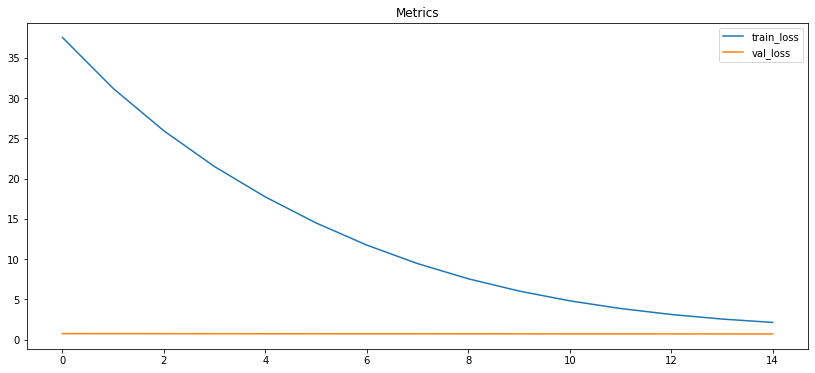

0it [00:00, ?it/s]

train_epoch_loss: 1.8170011980193002
latent_mu mean and std: 0.003906059777364135 0.016995446756482124
latent_logsigma mean and std: 0.0032430398277938366 0.023059800267219543


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6905741871645054


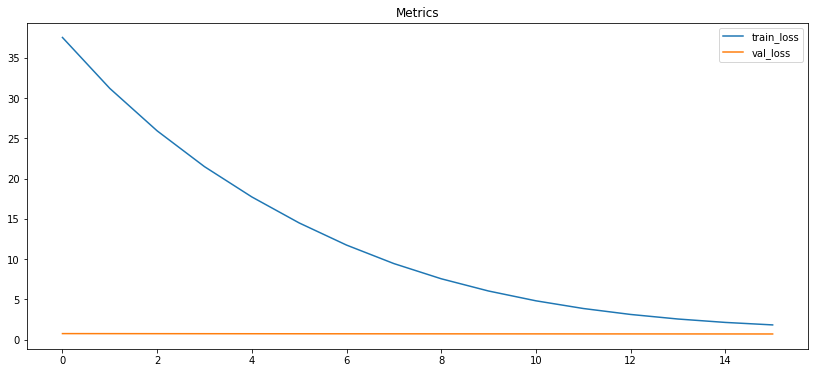

0it [00:00, ?it/s]

train_epoch_loss: 1.589465618133545
latent_mu mean and std: 0.0032900283113121986 0.014447561465203762
latent_logsigma mean and std: 0.002871382050216198 0.020493196323513985


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6885399137826069


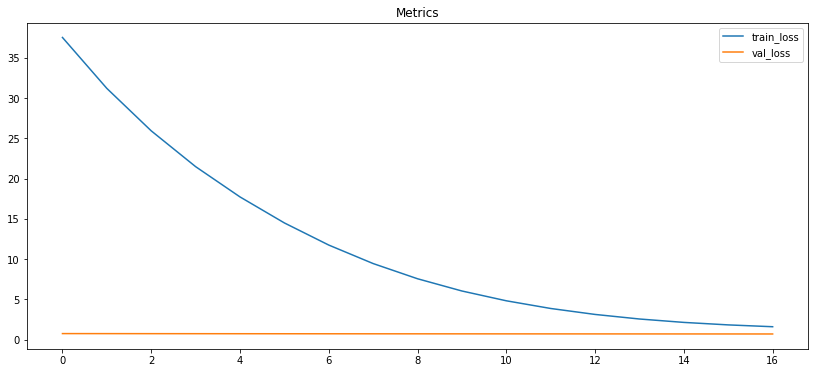

0it [00:00, ?it/s]

train_epoch_loss: 1.4211434977395194
latent_mu mean and std: 0.0027867623139172792 0.012526420876383781
latent_logsigma mean and std: 0.002521747024729848 0.018098387867212296


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6864024141020533


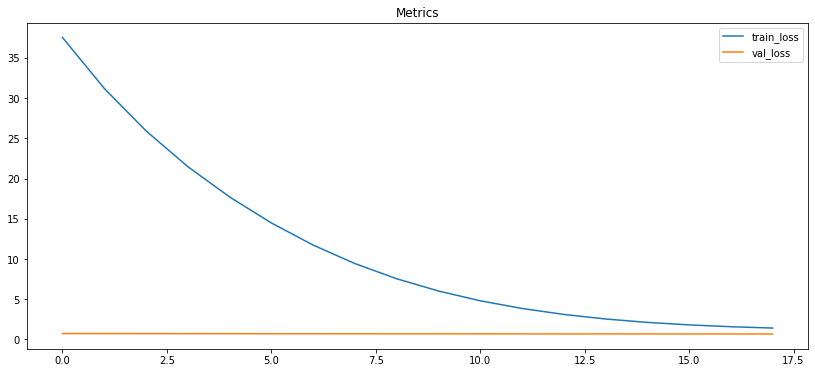

0it [00:00, ?it/s]

train_epoch_loss: 1.2947402170726232
latent_mu mean and std: 0.002376228105276823 0.011074371635913849
latent_logsigma mean and std: 0.002201021183282137 0.01594642736017704


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6842595603290027


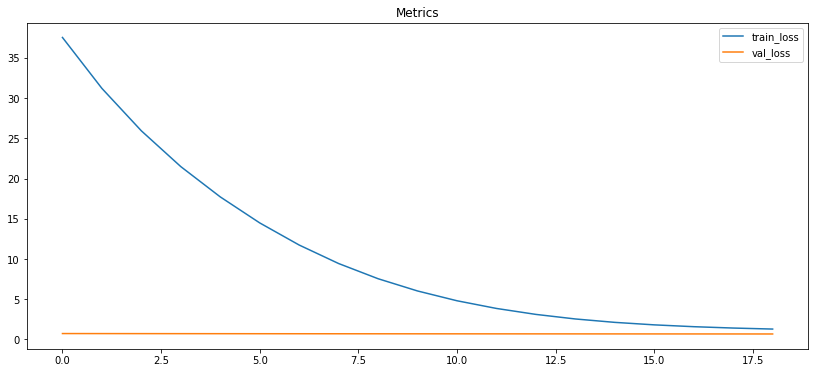

0it [00:00, ?it/s]

train_epoch_loss: 1.1991993359157018
latent_mu mean and std: 0.002045090077444911 0.009954934008419514
latent_logsigma mean and std: 0.0019162663957104087 0.014080077409744263


  0%|          | 0/5520 [00:00<?, ?it/s]

val_epoch_loss: 0.6823259354933449


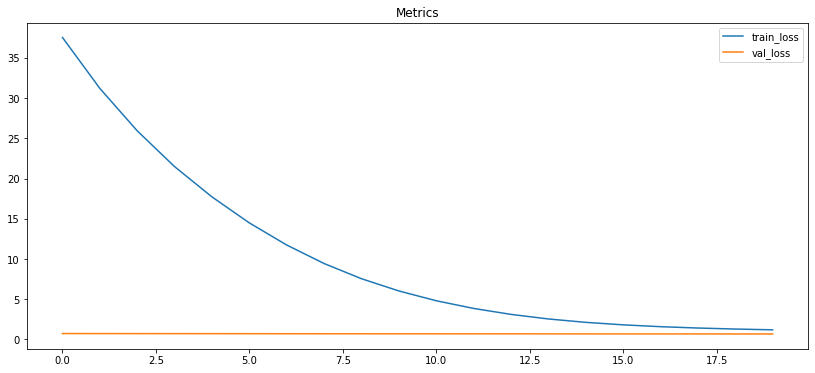

([37.540626117161345,
  31.209425245012557,
  25.934685162135533,
  21.48539434160505,
  17.72185434613909,
  14.489146845681327,
  11.738544532230922,
  9.439456803458077,
  7.551230328423636,
  6.0297121320452005,
  4.8125381129128595,
  3.857087646211897,
  3.116597448076521,
  2.5492728097098216,
  2.1266397408076694,
  1.8170011980193002,
  1.589465618133545,
  1.4211434977395194,
  1.2947402170726232,
  1.1991993359157018],
 [0.7363884252374587,
  0.7320506715364214,
  0.7275552340607713,
  0.7238064144184624,
  0.7200061074849488,
  0.7162526082085526,
  0.7130918523863606,
  0.7101897875521926,
  0.7071105921721976,
  0.7046028844904209,
  0.7020429096036199,
  0.699519266144953,
  0.6975877083783997,
  0.6949426469379577,
  0.6928902585221374,
  0.6905741871645054,
  0.6885399137826069,
  0.6864024141020533,
  0.6842595603290027,
  0.6823259354933449])

In [ ]:
nvae_train(nvar_autoencoder, 20 , criterion_vae,  optimizer_vae)

In [ ]:
 # val_losses = []
nvar_autoencoder.eval()
test_losses = []
with torch.no_grad():
    for X_batch_v in tqdm(test_loader):
      X_batch_v = X_batch_v.to(device)
      # print(X_batch_v.shape)
      # X_batch_v = X_batch_v.reshape(-1, 61)
      mu_v, logsigma_v, reconstruction_v = nvar_autoencoder(X_batch_v)
      loss = criterion_vae(X_batch_v, mu_v, logsigma_v, reconstruction_v)
      test_losses.append(loss.item())
# val_losses.append(np.mean(val_losses_per_epoch))


  0%|          | 0/5520 [00:00<?, ?it/s]

In [ ]:
pd.Series(test_losses).describe()

count    5520.000000
mean        0.681677
std         0.034770
min         0.324517
25%         0.668021
50%         0.681969
75%         0.696855
max         1.623530
dtype: float64

Text(0.5, 1.0, 'Scatterplot with 999-percentile threshold')

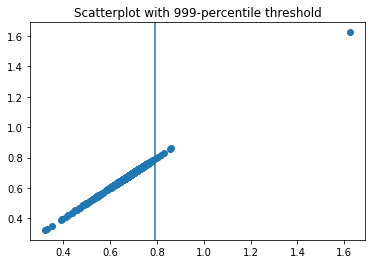

In [ ]:
loss_sc = []
for i in test_losses:
    loss_sc.append((i,i))

plt.scatter(*zip(*loss_sc))
plt.axvline(pd.Series(test_losses).quantile(0.9987), 0.0, 1)
plt.title('Scatterplot with 999-percentile threshold')

In [ ]:
thr_val = pd.Series(test_losses).quantile(0.999)
print(thr_val)
y_pred = pd.Series(test_losses).apply(lambda x: 1 if x > 1 else 0)

0.8007509770393403


In [ ]:
y_pred.value_counts()

0    5519
1       1
dtype: int64

In [ ]:
print(classification_report(y_pred, pd.Series(list(np.array(y_test1)))))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5519
           1       0.03      1.00      0.06         1

    accuracy                           0.99      5520
   macro avg       0.52      1.00      0.53      5520
weighted avg       1.00      0.99      1.00      5520



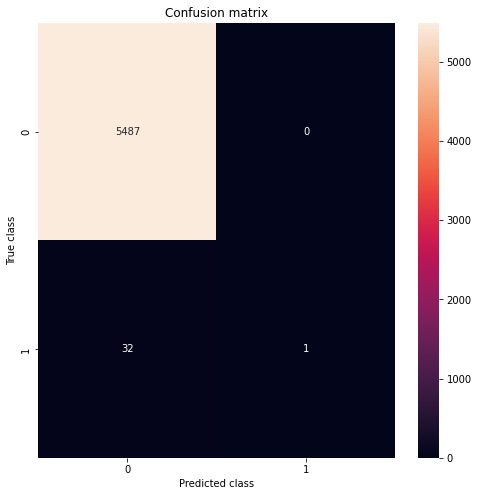

In [ ]:
conf_matrix = confusion_matrix( pd.Series(list(np.array(y_test1))) ,y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()